<a href="https://colab.research.google.com/github/jfdac11/DataMiningPI/blob/develop/Deteccao_de_Anomalias2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das Bibliotecas


In [ ]:
from sklearn.cluster import KMeans
from numpy import argsort,sqrt
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

# Importação da base de dados
## Os arquivos serão importados pelo google drive da equipe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/Shareddrives/PI_2_2021'

Mounted at /content/drive


In [ ]:
df_2019 = pd.read_csv(path+'/Mortalidade_Geral_2019.csv', header=0, sep=';', low_memory=False, encoding='latin1')
df_2019.shape

(1349801, 87)

In [ ]:
df_2019.head()

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,SERIESCFAL,OCUP,CODMUNRES,LOCOCOR,CODESTAB,ESTABDESCR,CODMUNOCOR,IDADEMAE,ESCMAE,ESCMAE2010,SERIESCMAE,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,GESTACAO,PARTO,OBITOPARTO,PESO,TPMORTEOCO,OBITOGRAV,OBITOPUERP,ASSISTMED,EXAME,CIRURGIA,NECROPSIA,...,COMUNSVOIM,DTATESTADO,CIRCOBITO,ACIDTRAB,FONTE,NUMEROLOTE,TPPOS,DTINVESTIG,CAUSABAS_O,DTCADASTRO,ATESTANTE,STCODIFICA,CODIFICADO,VERSAOSIST,VERSAOSCB,FONTEINV,DTRECEBIM,ATESTADO,DTRECORIGA,CAUSAMAT,ESCMAEAGR1,ESCFALAGR1,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,NUDIASOBIN,DTCADINV,TPOBITOCOR,DTCONINV,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
0,1,2,21012019,540.0,829.0,290750.0,18021961.0,457,1,2.0,1.0,2.0,1.0,NaN,512105.0,290750,1,2388685.0,NaN,290750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,21012019.0,NaN,NaN,NaN,20190009.0,NaN,NaN,I120,12022019.0,2.0,S,S,3.2.00,3.2,NaN,13022019.0,R570/J81/I10/N189,13022019,NaN,NaN,10.0,0.0,1,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,2,28012019,1630.0,829.0,290070.0,3071938.0,480,2,NaN,1.0,1.0,0.0,NaN,999992.0,290750,1,2388685.0,NaN,290750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,28012019.0,NaN,NaN,NaN,20190009.0,NaN,NaN,A419,12022019.0,NaN,S,S,3.2.00,3.2,NaN,13022019.0,A419,13022019,NaN,NaN,0.0,0.0,1,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1,2,27012019,2320.0,829.0,290750.0,15111945.0,473,2,4.0,2.0,3.0,1.0,4.0,999992.0,290750,1,2388685.0,NaN,290750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27012019.0,NaN,NaN,NaN,20190009.0,NaN,NaN,E039,12022019.0,5.0,S,S,3.2.00,3.2,NaN,13022019.0,I500/I10/E039,13022019,NaN,NaN,2.0,0.0,1,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,1,2,12012019,2300.0,829.0,290750.0,4111971.0,447,1,4.0,2.0,4.0,3.0,3.0,NaN,290750,1,2388685.0,NaN,290750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,...,NaN,12012019.0,NaN,NaN,NaN,20190009.0,NaN,NaN,R220,12022019.0,5.0,S,S,3.2.00,3.2,NaN,13022019.0,J960/R220,13022019,NaN,NaN,6.0,0.0,1,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,1,2,10012019,1726.0,829.0,292520.0,12101946.0,472,2,4.0,1.0,1.0,0.0,NaN,999992.0,290750,1,2388685.0,NaN,290750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10012019.0,NaN,NaN,NaN,20190009.0,NaN,NaN,C159,12022019.0,5.0,S,S,3.2.00,3.2,NaN,13022019.0,J960/C159,13022019,NaN,NaN,0.0,0.0,1,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


# Tratamento de dados NaN (Not a Number)
## O algoritmo de clusterização do K-means não pode ser executado com dados NaN, por isso os dados NaN foram removidos da coluna que será utilizadaa para o agrupamento 

In [ ]:
df_2019 = df_2019.loc[df_2019.IDADE.notnull()]
df_2019 = df_2019.reset_index(drop=True)

# Preparação para a clusterização
## Foi separada uma amostra de 100.000 tuplas para detecção de possíveis anomalias 

In [ ]:
DF = df_2019[["IDADE"]][:100000]

In [ ]:
x = DF.to_numpy()

# Clusterização
## Foi utilizado o algoritmo do K-Means para poder fazer o agrupamento dos dados, juntamente com o cálculo euclidiano da distância entre pontos.
## Dessa forma os 150 pontos mais distantes serão considerados possíveis anomalias   

In [ ]:
def KmeansInstance(x):
  kmeans = KMeans(n_clusters = 1).fit(x)
  center = kmeans.cluster_centers_ 
  distance = np.sqrt((x - center)**2)
  order_index = np.argsort(distance, axis = 0)
  indexes = order_index[-150:]
  values = x[indexes]
  return indexes, values

In [ ]:
indexes, values = KmeansInstance(x)

In [ ]:
indexes[1,0]

6258

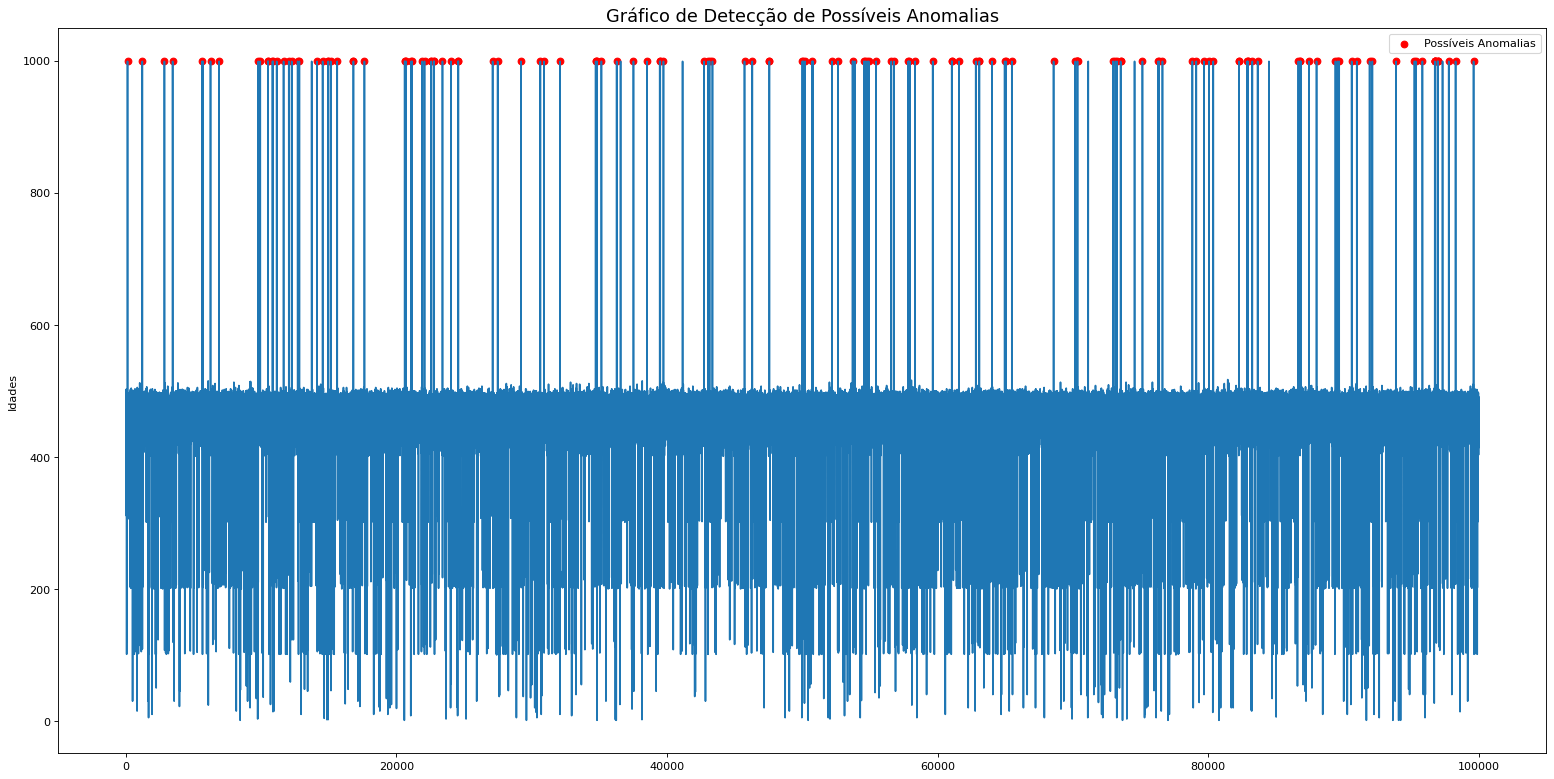

In [ ]:

x_ax = range(100000)
figure(figsize=(24, 12), dpi=80)
plt.plot(x_ax, x)
plt.scatter(indexes, values, color='r').set_label("Possíveis Anomalias")


plt.ylabel('Idades')
plt.title('Gráfico de Detecção de Possíveis Anomalias',fontdict={'fontsize': 16})
plt.legend()  
plt.show()